<a href="https://colab.research.google.com/github/am610/GWCCSN_EOS_Ye/blob/main/18_EoS_NN_Real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### @AyanMitra, 2023
##### This is the notebook with -2, +6 ms, and Ye varying dataset
#### 1D-CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# drive.mount('/content/drive')
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
from google.colab import files
def tran_plot(df,r):
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.signal import butter, filtfilt, windows
  from numpy.fft import fft,fftfreq,fftshift
  import matplotlib.pyplot as plt
  from scipy.signal import butter, filtfilt, windows

  # Re-load the given DataFrame and perform the same operations as before
  df_sample = df

  N = r
  # Extract one row and split it into time and signal components
  row = df_sample.iloc[N]
  time = row[:len(row) // 2]
  signal = row[len(row) // 2:-1]  # excluding the label column


  # Plot the results
  plt.figure(figsize=(14, 5))

#  plt.subplot(2, 1, 1)
  plt.plot(time, signal, label="Row = %s, %s"%(N, row[-1]))
  plt.legend()

  #plt.tight_layout()
  plt.tight_layout()
  plt.grid(False)
  plt.show()

import matplotlib.pyplot as plt

# Setting the rcParams for default plotting preferences
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.labelsize'] = 14

# Ensuring minor ticks on all four sides
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelpad'] = 10

In [18]:
'''
import numpy as np
from scipy.signal import windows, butter, filtfilt
import pandas as pd

# Load your data
df = data#


# Split the DataFrame into time and signal data
midpoint = len(df.columns) // 2
time_data = df.iloc[:, :midpoint]
signal_data = df.iloc[:, midpoint:-1]  # excluding the label column

# Create a Tukey window
alpha = 0.1
window = windows.tukey(M=signal_data.shape[0], alpha=alpha)

# Apply the window to the signal data
windowed_signal_data = signal_data.multiply(window, axis=0)

# Design a low-pass Butterworth filter
order = 10
attenuation = 0.25  # This should be the critical frequency (as a fraction of the Nyquist frequency)
b, a = butter(order, attenuation, btype='low')

# Apply the filter to the windowed signal data
filtered_signal_data = windowed_signal_data.apply(lambda x: filtfilt(b, a, x))

# Combine the time data, filtered signal data, and labels back into a single DataFrame
df_transformed = pd.concat([time_data, filtered_signal_data, df['Label']], axis=1)

save_path_with_modified_columns = "/content/drive/MyDrive/data_18eos_10_49_Transformed.csv"
df_transformed.to_csv(save_path_with_modified_columns, index=False)
''';
# One Time Application

In [65]:
# Original Data
data = pd.read_csv('/content/drive/MyDrive/data_18eos_10_49.csv')

In [3]:
df_transformed = pd.read_csv('/content/drive/MyDrive/data_18eos_10_49_Transformed.csv')

In [5]:
np.shape(data)

(1350, 1181)

In [71]:
mid_point = int((df_transformed.shape[1] - 1) / 2)
# Filter the time and signal columns based on the mask, and concatenate with the 'Label' column
time_filtered = df_transformed.iloc[:, :mid_point]
signal_filtered = df_transformed.iloc[:, mid_point:-1]

time_filtered.iloc[0]

0.0     -10.0
1.0      -9.9
2.0      -9.8
3.0      -9.7
4.0      -9.6
         ... 
585.0    48.5
586.0    48.6
587.0    48.7
588.0    48.8
589.0    48.9
Name: 0, Length: 590, dtype: float64

In [5]:
# Get the unique labels in the dataset
unique_labels = df_transformed['Label'].unique()
unique_labels

array(['BHBL', 'BHBLP', 'GShenFSU1.7', 'GShenFSU2.1', 'GShenNL3', 'HSDD2',
       'HSFSG', 'HShen', 'HShenH', 'HSIUF', 'HSNL3', 'HSTM1', 'HSTMA',
       'LS180', 'LS220', 'LS375', 'SFHo', 'SFHx'], dtype=object)

<ipython-input-27-34017dd2f946>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=colormap_jet), ticks=list(label_integer_map.values()), spacing='proportional')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

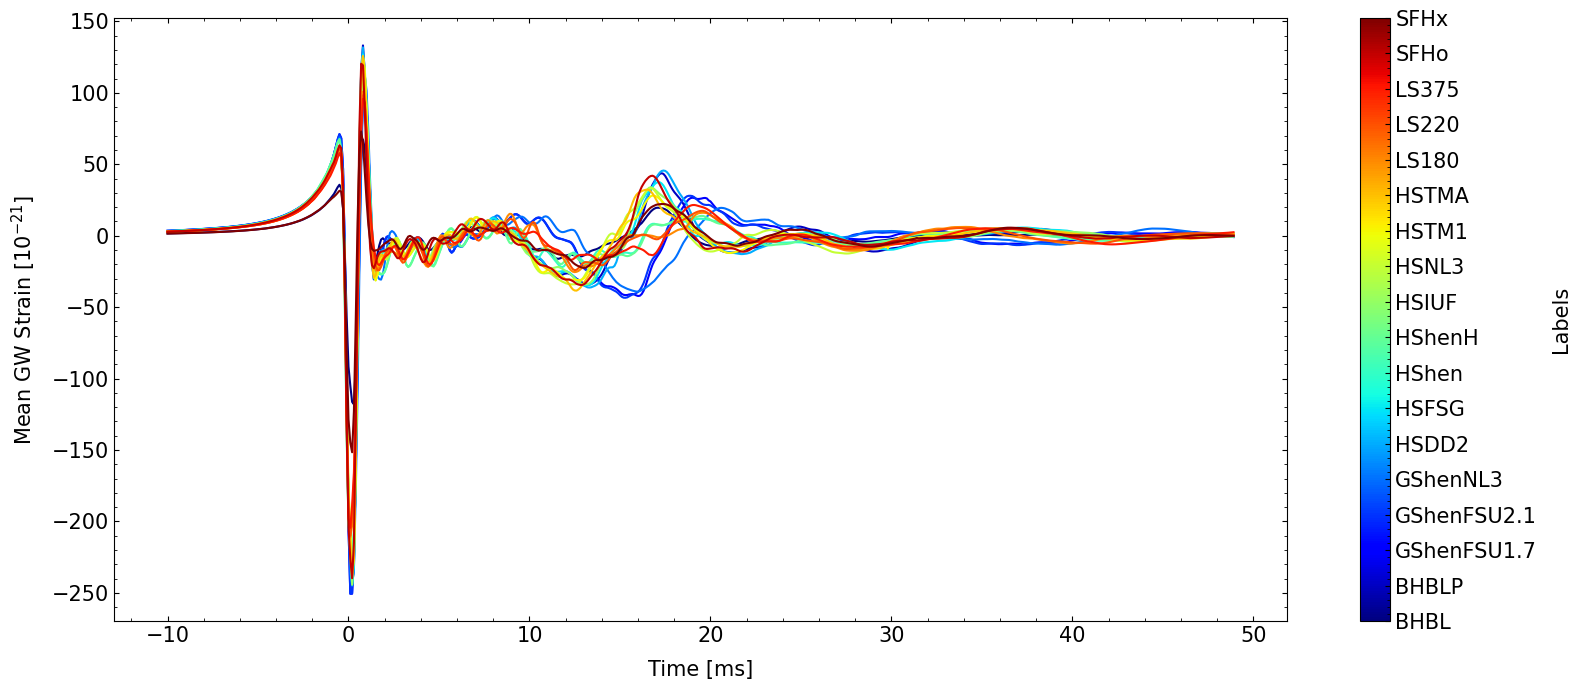

In [27]:
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
colormap_jet = cm.jet
norm = cm.colors.Normalize(vmin=0, vmax=len(unique_labels)-1)
label_integer_map = {label: index for index, label in enumerate(unique_labels)}


# Replace 'data' with 'df_transformed'
#df_transformed = pd.read_csv('/mnt/data/data_18eos_10_49_Transformed.csv')

# Split the df_transformed into time, signal, and label parts
half_len = int((df_transformed.shape[1] - 1) / 2)
time_data = df_transformed.iloc[:, :half_len]
signal_data = df_transformed.iloc[:, half_len:-1]
labels = df_transformed['Label']

# Calculate the mean curve for each unique label
mean_curves = signal_data.groupby(labels).mean()

plt.figure(figsize=(16, 7))

# Use the first row of the time_data as the common time axis
time_values = time_data.iloc[0].values

# Plot the mean curve for each unique label using the jet colormap
for label in unique_labels:
    plt.plot(time_values, mean_curves.loc[label], color=colormap_jet(norm(label_integer_map[label])), label=label)

# Set colorbar with label ticks using the jet colormap
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=colormap_jet), ticks=list(label_integer_map.values()), spacing='proportional')
cbar.set_label('Labels')
cbar.set_ticklabels(list(label_integer_map.keys()))

plt.xlabel('Time [ms]')
plt.ylabel(r'Mean GW Strain $[10^{-21}]$')
#plt.title('Mean Signals as a function of time with Colorbar (Jet)')
plt.tight_layout()
plt.grid(False)  # Remove grid
plt.tight_layout()
plt.savefig("drive/MyDrive/EoS_10_50_Mean_Curve.pdf", bbox_inches='tight')
files.download('drive/MyDrive/EoS_10_50_Mean_Curve.pdf')
#plt.show()

<ipython-input-96-22289e3e64d7>:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=colormap_jet), ticks=list(label_integer_map.values()), spacing='proportional')


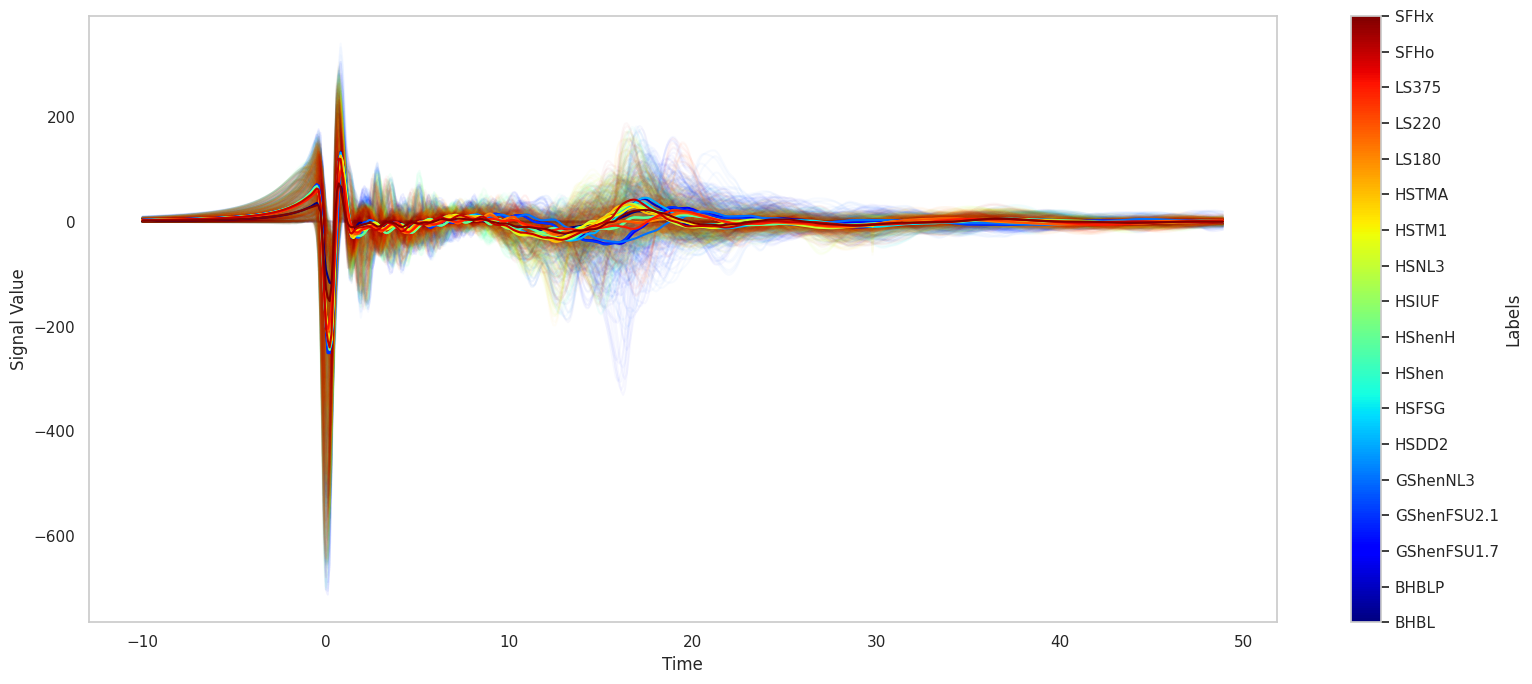

In [96]:
from matplotlib.cm import ScalarMappable

# Splitting the df_transformed into time, signal, and label parts
half_len = int((df_transformed.shape[1] - 1) / 2)
time_data = df_transformed.iloc[:, :half_len]
signal_data = df_transformed.iloc[:, half_len:-1]
labels = df_transformed['Label']
# Filtering out rows with NaN labels
non_nan_indices = labels.dropna().index

# Calculating the mean curve for each unique label
mean_curves = signal_data.groupby(labels).mean()

plt.figure(figsize=(16, 7))

# Using the first row of the time_data as the common time axis
time_values = time_data.iloc[0].values


# Underneath the mean curves, plot all individual signal points vs. time for each label with a transparency of alpha = 0.1
for idx in non_nan_indices:
    label = labels[idx]
    row = signal_data.iloc[idx]
    #plt.scatter(time_values, row.values, color=colormap_jet(norm(label_integer_map[label])), alpha=0.01, s=5)
    plt.plot(time_values, row.values, color=colormap_jet(norm(label_integer_map[label])), alpha=0.03)


# Plotting the mean curve for each unique label using the jet colormap
for label in unique_labels:
    plt.plot(time_values, mean_curves.loc[label], color=colormap_jet(norm(label_integer_map[label])),label=label) #linewidth=2,


# Setting colorbar with label ticks using the jet colormap
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=colormap_jet), ticks=list(label_integer_map.values()), spacing='proportional')
cbar.set_label('Labels')
cbar.set_ticklabels(list(label_integer_map.keys()))

plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.tight_layout()
plt.grid(False)  # Remove grid
plt.show()


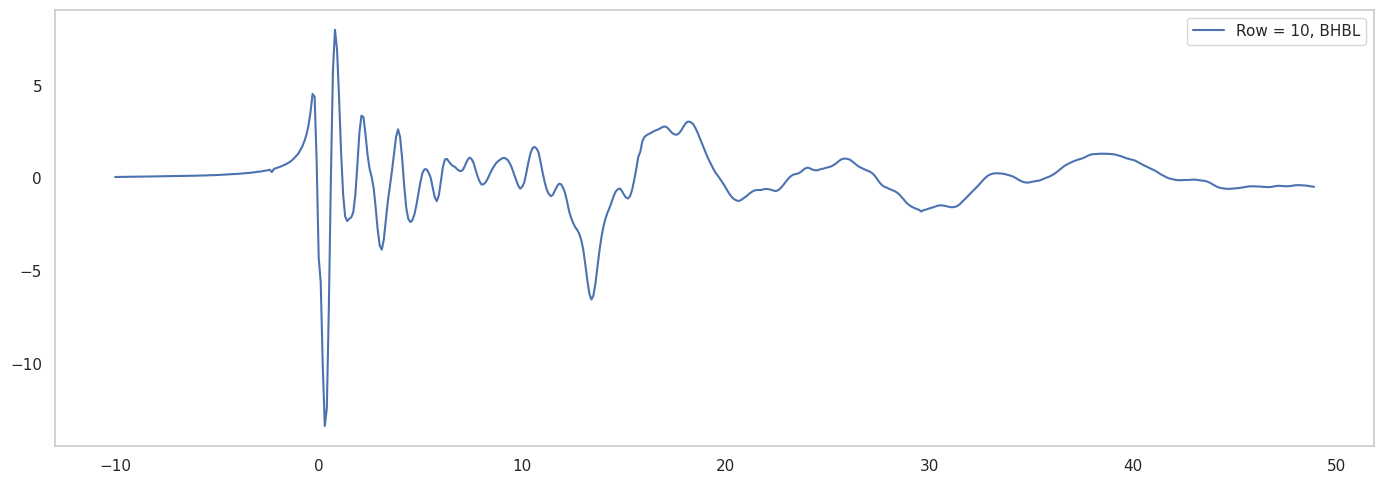

In [111]:
tran_plot(df_transformed,10)

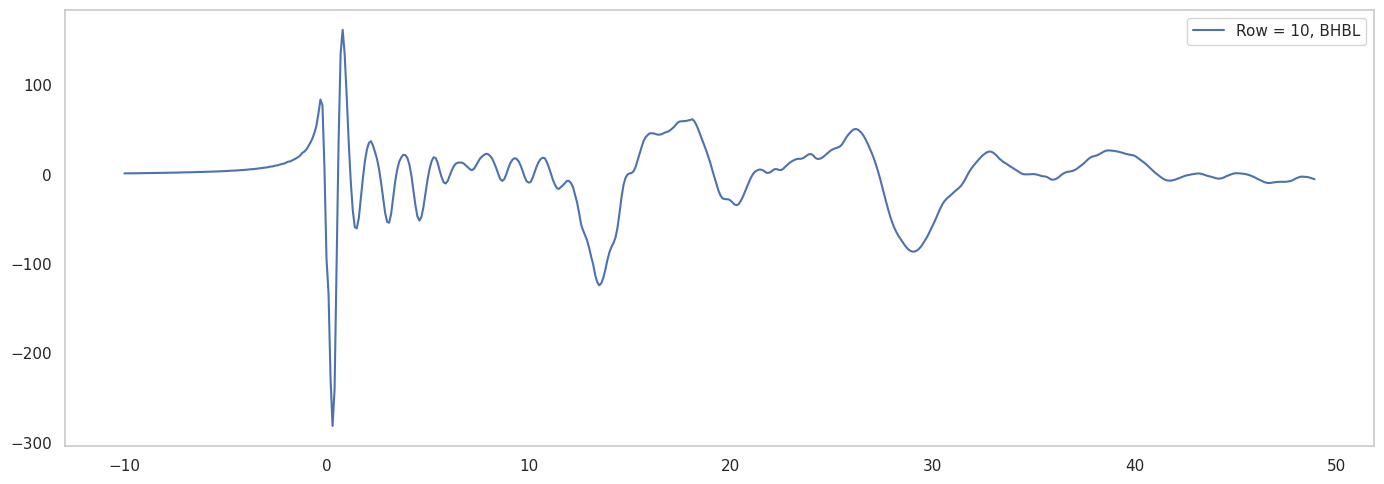

In [110]:
tran_plot(data,10)

In [21]:
# The input shape for the model should be (1180, 1)
shape = np.shape(df_transformed)[1]-1
input_shape = (shape, 1)

model = tf.keras.Sequential([
    layers.InputLayer(input_shape=input_shape),

    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),

    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),

    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),

    # Assuming you have 18 classes in your Label column
    layers.Dense(18, activation='softmax')
])

model.compile(optimizer='RMSProp',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Convert the labels to integer encoding
labels_integer_encoded = pd.factorize(df_transformed['Label'])[0]

# Reshape the data
reshaped_data = df_transformed.iloc[:, :-1].values.reshape(-1, shape, 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_data, labels_integer_encoded, test_size=0.2, random_state=42)



# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
34/34 [==============================] - 12s 336ms/step - loss: 8.5869 - accuracy: 0.1093 - val_loss: 2.4646 - val_accuracy: 0.2333
Epoch 2/10
34/34 [==============================] - 11s 327ms/step - loss: 2.1859 - accuracy: 0.2694 - val_loss: 2.2446 - val_accuracy: 0.3222
Epoch 3/10
34/34 [==============================] - 10s 298ms/step - loss: 1.6599 - accuracy: 0.4120 - val_loss: 1.5485 - val_accuracy: 0.4037
Epoch 4/10
34/34 [==============================] - 10s 292ms/step - loss: 1.2058 - accuracy: 0.5722 - val_loss: 1.4694 - val_accuracy: 0.4481
Epoch 5/10
34/34 [==============================] - 11s 332ms/step - loss: 0.9053 - accuracy: 0.6565 - val_loss: 1.3592 - val_accuracy: 0.5185
Epoch 6/10
34/34 [==============================] - 11s 331ms/step - loss: 0.7290 - accuracy: 0.7343 - val_loss: 0.8896 - val_accuracy: 0.6519
Epoch 7/10
34/34 [==============================] - 9s 258ms/step - loss: 0.5507 - accuracy: 0.8037 - val_loss: 1.0125 - val_accuracy: 0.6407


In [ ]:
model.summary()
model.save('edwards_model.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 856, 32)           128       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 428, 32)          0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 426, 64)           6208      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 213, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 211, 128)          24704     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 105, 128)        

In [ ]:
netron.start('edwards_model.h5')

Serving 'edwards_model.h5' at http://localhost:8081


('localhost', 8081)

In [ ]:
from google.colab import files
files.download('edwards_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

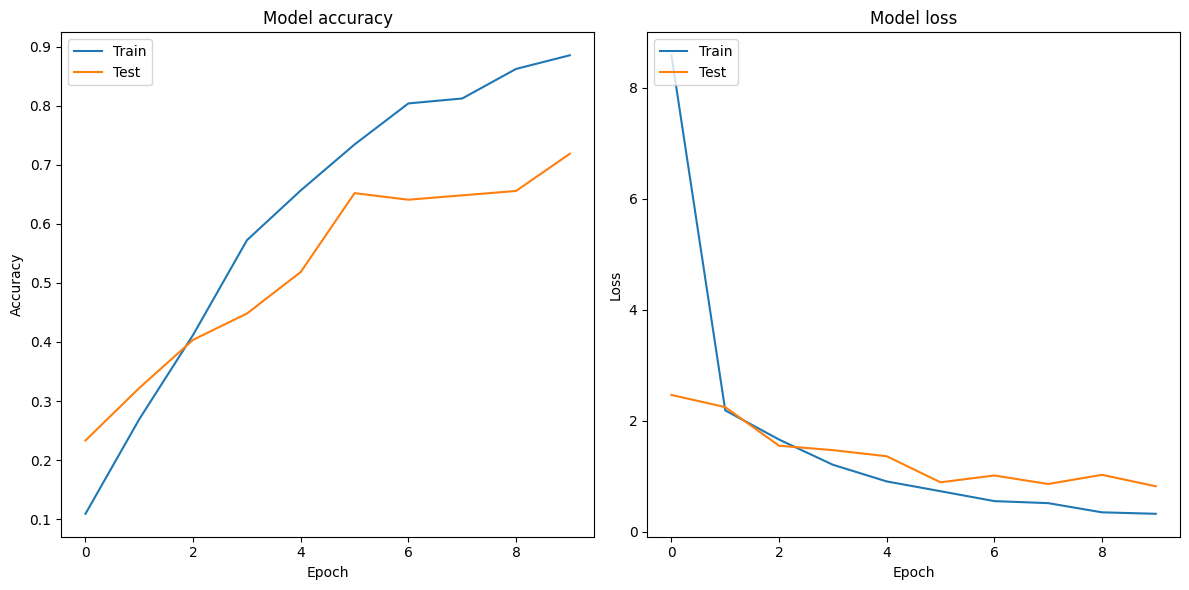

In [23]:


# Fit the model and store the history
#history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


In [24]:
# Get the number of columns in the original DataFrame
df = df_transformed
num_cols = df.shape[1]

# The midpoint of each row is where the signal values start
midpoint = num_cols // 2

# Split each row into time values, signal values, and label
time_values = df.iloc[:, :midpoint]
signal_values = df.iloc[:, midpoint:-1]
labels = df.iloc[:, -1]

# Stack the time and signal values
time_values_stacked = time_values.stack().reset_index(drop=True)
signal_values_stacked = signal_values.stack().reset_index(drop=True)

# Repeat the labels to match the length of time_values_stacked
labels_repeated = labels.repeat(midpoint).reset_index(drop=True)

# Create the new DataFrame
df_new = pd.DataFrame({
    'Time': time_values_stacked,
    'Signal': signal_values_stacked,
    'Label': labels_repeated
})

# Display the first few rows of the new dataframe
#df_new.head()
set(labels_repeated)

In [58]:
# Count the number of each label
label_counts = df_transformed['Label'].value_counts()

# Show the counts
#label_counts

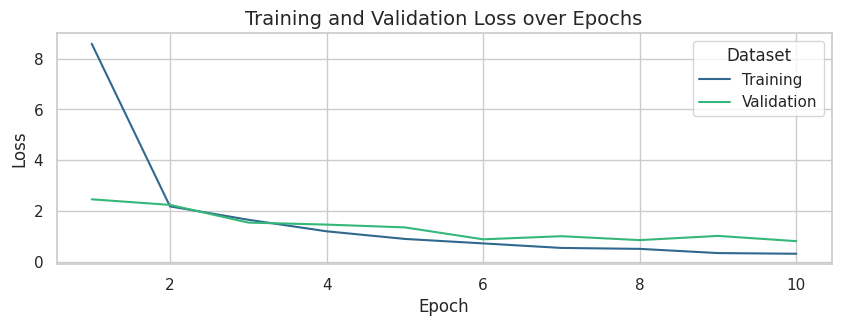

In [59]:
# Prepare data in DataFrame format
data = pd.DataFrame({
    'Epoch': list(range(1, len(history.history['loss']) + 1)) * 2,
    'Loss': history.history['loss'] + history.history['val_loss'],
    'Dataset': ['Training'] * len(history.history['loss']) + ['Validation'] * len(history.history['val_loss'])
})

# Create lineplot
plt.figure(figsize=(10, 3))
sns.lineplot(x='Epoch', y='Loss', hue='Dataset', data=data, palette='viridis')

# Add a title
plt.title('Training and Validation Loss over Epochs', fontsize=14)

plt.show()

In [60]:
# Show the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 1178, 32)          128       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 589, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 587, 64)           6208      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 293, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 291, 128)          24704     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 145, 128)        

9/9 [==============================] - 0s 41ms/step


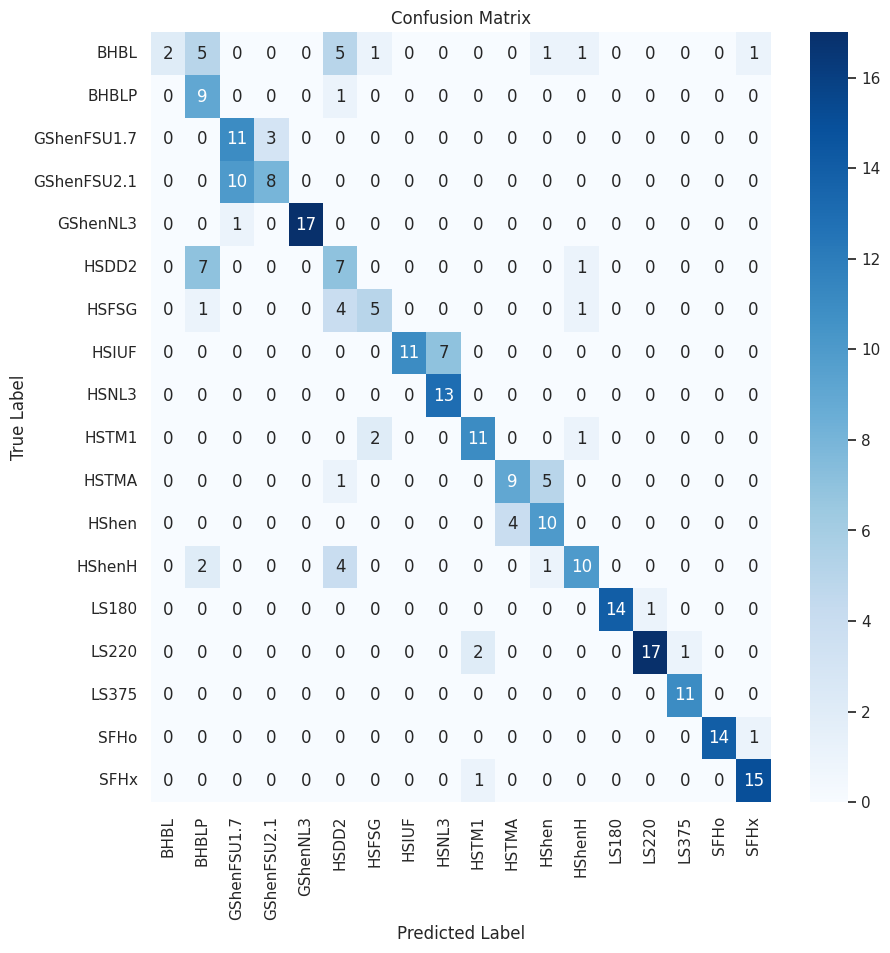

Accuracy: 0.7185185185185186
Precision: 0.7621923102315259
Recall: 0.7263515759839289
F1 Score: 0.7081871908381479


In [31]:
# Get predicted labels
predictions = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder and transform the labels to integers
# Assuming 'df' is your original DataFrame and 'Label' is the column with labels
encoder.fit(df_transformed['Label'])

#class_names = encoder.classes_

# Assuming 'y_test' is your test labels and 'model' is your trained model
predictions = model.predict(X_test)
predictions_indices = np.argmax(predictions, axis=1)

# Get class names from the label encoder
class_names = encoder.classes_

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions_indices)

# Convert numerical labels back to original names for plotting
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

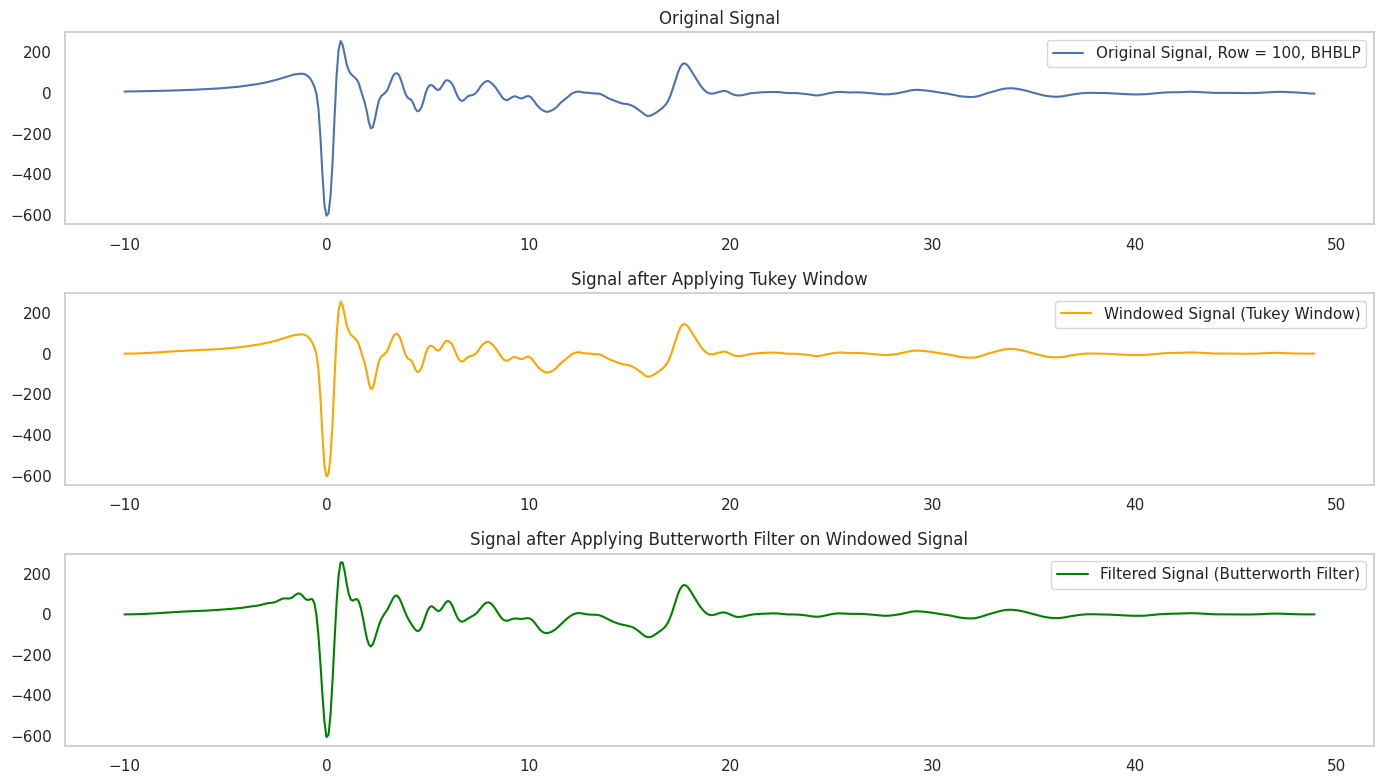

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, windows
# Re-load the given DataFrame and perform the same operations as before
df_sample = data

N = 100
# Extract one row and split it into time and signal components
row = df_sample.iloc[N]
time = row[:len(row) // 2]
signal = row[len(row) // 2:-1]  # excluding the label column

# Apply the Tukey window to the signal
alpha = 0.1
window = windows.tukey(M=len(signal), alpha=alpha)
windowed_signal = signal * window

# Design a low-pass Butterworth filter and apply to the windowed signal
order = 4
cutoff = 30  # Cut off frequency
order = 10
attenuation = 0.25  # This should be the critical frequency (as a fraction of the Nyquist frequency)
b, a = butter(order, attenuation, btype='low')
filtered_signal = filtfilt(b, a, windowed_signal)

# Plot the results
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(time, signal, label="Original Signal, Row = %s, %s"%(N, row[-1]))
plt.title("Original Signal")
plt.legend()
plt.grid(False)
plt.subplot(3, 1, 2)
plt.plot(time, windowed_signal, label="Windowed Signal (Tukey Window)", color='orange')
plt.title("Signal after Applying Tukey Window")
plt.legend()
plt.grid(False)
plt.subplot(3, 1, 3)
plt.plot(time, filtered_signal, label="Filtered Signal (Butterworth Filter)", color='green')
plt.title("Signal after Applying Butterworth Filter on Windowed Signal")
plt.legend()

plt.tight_layout()
plt.grid(False)
plt.show()

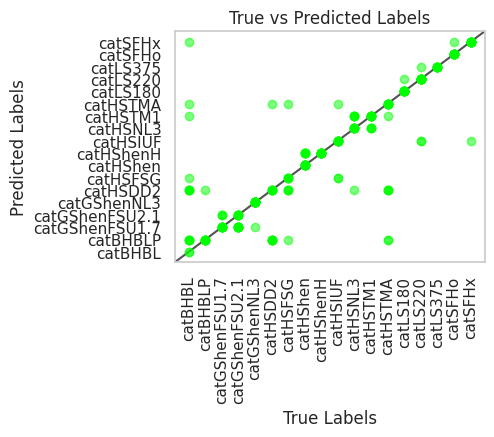

In [104]:
# Assuming you have a list of category names called `categories`
# categories = ["cat1", "cat2", "cat3", ...]

# For demonstration purposes, I'll create a dummy categories list.
# You should replace this with your actual list.
categories = [f"cat{i}" for i in unique_labels]  # Dummy category names

plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_labels, color='lime',alpha=0.5,)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')

# Set ticks and tick labels
ticks = list(range(len(categories)))
plt.xticks(ticks, categories, rotation=90)
plt.yticks(ticks, categories)

# Reference line
lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)
plt.grid(False)
plt.show()
